<a href="https://colab.research.google.com/github/mn000000/Simulacion-1/blob/main/Ejemplo_4_Flecha_y_Cojinete_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="cojin.png">


Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

### Solución

**a) La probabilidad de que haya interferencia**

La interferencia ocurre si $ x_2 > x_1 $.

1. $ x_1 \sim N(1.5, 0.0016) $
2. $ x_2 \sim N(1.48, 0.0009) $

La diferencia $ x_2 - x_1 $ sigue una distribución normal con:
$$ \mu_{x_2 - x_1} = 1.48 - 1.5 = -0.02 $$
$$ \sigma_{x_2 - x_1} = \sqrt{0.0009 + 0.0016} = \sqrt{0.0025} = 0.05 $$

Por lo tanto,
$$ x_2 - x_1 \sim N(-0.02, 0.05^2) $$

La probabilidad de interferencia es:
$$ P(x_2 > x_1) = P(x_2 - x_1 > 0) = P\left( Z > \frac{0.02}{0.05} \right) $$
$$ P(Z > 0.4) = 1 - P(Z \leq 0.4) $$
$$ P(Z \leq 0.4) \approx 0.6554 $$
$$ P(Z > 0.4) = 1 - 0.6554 = 0.3446 $$

**b) Número de simulaciones necesarias**

La fórmula para el tamaño de muestra es:
$$ N = \left( \frac{z_{\alpha/2} \cdot \sigma}{\epsilon} \right)^2 $$

Para este problema:
$$ \sigma = 0.05 $$
$$ \epsilon = 0.01 $$
$$ z_{\alpha/2} = 1.96 $$

Sustituimos estos valores:
$$ N = \left( \frac{1.96 \cdot 0.05}{0.01} \right)^2 $$
$$ N = (9.8)^2 = 96.04 $$

Por lo tanto, se necesitan al menos 97 simulaciones.


### Desarrollo Matemático
#### Distribución Normal
Para $x_1 \sim N(1.5, 0.04)$ y $x_2 \sim N(1.48, 0.03)$, las distribuciones normales tienen las siguientes propiedades:
1. **Media y Varianza**:
- $x_1 \sim N(\mu_1, \sigma_1^2)$
- $x_2 \sim N(\mu_2, \sigma_2^2)$

Donde:
- $\mu_1 = 1.5$
- $\sigma_1^2 = 0.04$
- $\mu_2 = 1.48$
- $\sigma_2^2 = 0.03$

La diferencia $x_1 - x_2$ también sigue una distribución normal con:
- Media: $\mu_{x_1 - x_2} = \mu_1 - \mu_2$
- Varianza: $\sigma_{x_1 - x_2}^2 = \sigma_1^2 + \sigma_2^2$

            
### Justificación Matemática para $x_1 - x_2$

Si $x_1 \sim N(\mu_1, \sigma_1^2)$ y $x_2 \sim N(\mu_2, \sigma_2^2)$, entonces la diferencia $x_1 - x_2$ sigue una distribución normal con:

1. **Media**:
$$ \mu_{x_1 - x_2} = \mu_1 - \mu_2 $$

2. **Varianza**:
$$ \sigma_{x_1 - x_2}^2 = \sigma_1^2 + \sigma_2^2 $$

La razón es que la suma (o diferencia) de dos variables aleatorias normales es otra variable normal cuya media es la suma (o diferencia) de las medias y cuya varianza es la suma de las varianzas.

            




Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [ ]:
interferencia()

1

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [ ]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [ ]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

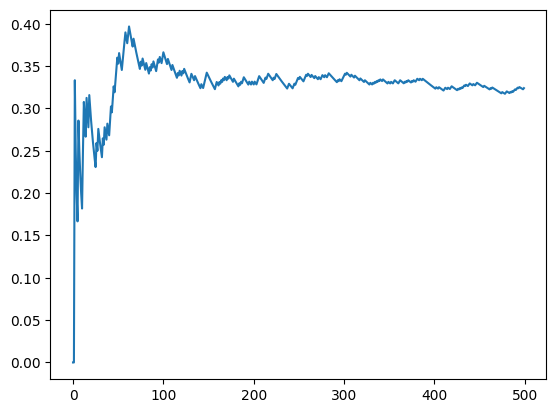

In [ ]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [ ]:
print(np.mean(X), np.std(X))

0.32770497931986886 0.03253348683077965


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [ ]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [ ]:
Y=modelo(120)

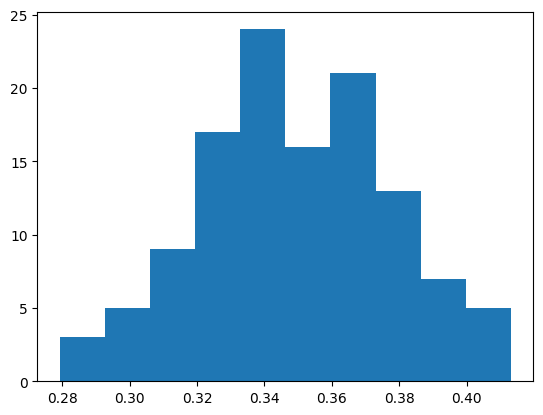

In [ ]:
plt.hist(Y)
plt.show()

In [ ]:
print(np.mean(Y), np.std(Y))

0.3494094082126191 0.028318936515607178


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$


### Desarrollo Matemático del Intervalo de Confianza

Para calcular el intervalo de confianza, seguimos estos pasos:

1. **Planteamiento inicial**: Sabemos que el estimador de la media muestral $ \bar{x} $ sigue una distribución normal si el tamaño de la muestra es suficientemente grande (Teorema Central del Límite):
$$ \bar{x} \sim N\left( \mu, \frac{\sigma^2}{n} \right) $$

2. **Desviación estándar muestral**: La desviación estándar de la media muestral es:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

3. **Intervalo de confianza**: Para un nivel de confianza del 95%, el valor crítico $ z_{\alpha/2} $ es aproximadamente 1.96. Entonces, el intervalo de confianza se calcula como:
$$ \bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

4. **Sustitución de $ s $ por $ \sigma $**: En la práctica, no siempre conocemos $ \sigma $ y usamos $ s $, la desviación estándar muestral, en su lugar:
$$ \bar{x} - z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} $$

Por lo tanto, el intervalo de confianza para la media verdadera $ \mu $ está dado por:
$$ \bar{x} - z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} $$

Donde:
- $ \bar{x} $ es la media muestral.
- $ s $ es la desviación estándar muestral.
- $ n $ es el tamaño de la muestra.
- $ z_{\alpha/2} $ es el valor crítico de la distribución normal estándar para un nivel de confianza dado.

            



In [ ]:
np.mean(Y)

0.3494094082126191

In [ ]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3415597994905177, 0.35725901693472056)

### Para determinar el número de simulaciones

### Número de Simulaciones
El número de simulaciones necesarias para que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $\epsilon$, con un nivel de confianza del $95\%$ es:
$$ N > \left( \frac{ \sigma z_{\alpha/2}}{\epsilon} \right)^2 $$



            
### Desarrollo Matemático del Número de Simulaciones

Para determinar el número de simulaciones necesarias para que la probabilidad estimada de interferencia difiera de su valor verdadero en menos de $ \epsilon $ con un nivel de confianza del 95%, utilizamos la siguiente fórmula:

$$ N > \left( \frac{ \sigma z_{\alpha/2}}{\epsilon} \right)^2 $$

Donde:
- $ N $ es el número de simulaciones necesarias.
- $ \sigma $ es la desviación estándar de la distribución.
- $ z_{\alpha/2} $ es el valor crítico de la distribución normal estándar para un nivel de confianza dado.
- $ \epsilon $ es el margen de error deseado.

Esta fórmula se deriva del intervalo de confianza para proporciones. Los pasos son los siguientes:

1. **Margen de error**: El margen de error $ E $ para una proporción es:
$$ \epsilon = z_{\alpha/2} \cdot \sqrt{\frac{p(1-p)}{N}} $$

2. **Despejar $ N $**: Para encontrar $ N $, reorganizamos la ecuación:
$$ N = \left( \frac{z_{\alpha/2} \cdot \sqrt{p(1-p)}}{\epsilon} \right)^2 $$

3. **Sustituir $ \epsilon $ y $ p(1-p) $**: Si el margen de error deseado es $ \epsilon $ y suponemos $ p(1-p) \approx \sigma^2 $, obtenemos:
$$ N = \left( \frac{z_{\alpha/2} \cdot \sigma}{\epsilon} \right)^2 $$

4. **Simplificar**: Finalmente, simplificamos la ecuación:
$$ N = \left( \frac{ \sigma z_{\alpha/2}}{\epsilon} \right)^2 $$


$$ N > \Bigg( \frac{ \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [ ]:
N = (2*np.std(X)*1.96/0.01)**2

In [ ]:
print(N)

162.6422441375871


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [ ]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.004831149822943304